# Combinging the latent space obatined from the 5000 input feature Vanilla Autoencoder architecutres of both Methylation and Gene Expression data

In [1]:
import os
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from keras import backend as K #For explicitly \adjusting the learning rate


# 2. Late Integration of Final Bottleneck features

In [57]:
import pandas as pd
meth_100_df_path = "LatentFeatures_PanCan_Meth_AE_chr_top50%MAD.csv"
ge_100_df_path = "LatentFeatures_PanCan_GE_AE_Vanilla.csv"
ge_100_df = pd.read_csv(ge_100_df_path, index_col=0)
meth_100_df = pd.read_csv(meth_100_df_path, index_col=[0,1,2,3,4])

In [58]:
ge_100_df.sort_index().head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_89,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99
TCGA-02-0047-01A-01R-1849-01,0.767661,11.157664,1.316574,7.090102,0.000000,0.0,10.413724,4.452527,0.000000,6.517584,...,4.096610,0.0,1.331688,7.632610,8.107608,0.0,0.0,9.790374,1.207318,4.313447
TCGA-02-0055-01A-01R-1849-01,1.962770,13.654064,4.144519,5.223788,0.052362,0.0,12.796559,3.118327,0.381563,4.654285,...,5.304467,0.0,2.212150,4.952759,8.496476,0.0,0.0,9.537054,2.841562,2.046081
TCGA-02-2483-01A-01R-1849-01,0.000000,11.290987,5.063180,7.868748,0.000000,0.0,14.245707,6.983301,0.365974,7.857316,...,7.210297,0.0,1.308484,5.491747,9.411943,0.0,0.0,9.285005,3.302628,4.477767
TCGA-02-2485-01A-01R-1849-01,0.268094,10.838562,4.284303,6.161497,0.000000,0.0,10.745022,5.260837,0.000000,6.457512,...,3.868405,0.0,0.478794,5.276661,8.335376,0.0,0.0,6.586106,2.747180,4.192972
TCGA-02-2486-01A-01R-1849-01,2.128415,9.226458,5.924656,5.687089,0.000000,0.0,10.637610,5.420157,0.111482,5.406715,...,5.188097,0.0,2.427351,2.989161,9.920049,0.0,0.0,7.060998,3.480376,2.216651


In [59]:
meth_100_df.sort_index().head()

,,,,,feature_0,feature_1,feature_3,feature_4,feature_5,feature_6,feature_9,feature_12,feature_13,feature_15,...,feature_85,feature_86,feature_90,feature_91,feature_92,feature_94,feature_96,feature_97,feature_98,feature_99
patient,sample,sample_type,aliquot,file,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4384,TCGA-05-4384-01A,01A,TCGA-05-4384-01A-01D-1756-05,Y:\qiu-lab\Bridget\data\meth\methylation_raw\lung_adenocarcinoma\1b083d25-72ca-42b2-9c3c-4e61f3c13a0e\jhu-usc.edu_LUAD.HumanMethylation450.3.lvl-3.TCGA-05-4384-01A-01D-1756-05.gdc_hg38_betaonly.txt,0.0,0.0,0.000000,0.978905,1.329851,2.796848,7.185993,5.893562,0.000000,4.418722,...,1.297175,0.0,0.0,5.725876,5.304277,0.0,6.477015,0.0,0.427556,4.598083
TCGA-05-4390,TCGA-05-4390-01A,01A,TCGA-05-4390-01A-02D-1756-05,Y:\qiu-lab\Bridget\data\meth\methylation_raw\lung_adenocarcinoma\9405aced-f061-49b4-9568-e40a401ee8ab\jhu-usc.edu_LUAD.HumanMethylation450.3.lvl-3.TCGA-05-4390-01A-02D-1756-05.gdc_hg38_betaonly.txt,0.0,0.0,2.702903,0.236698,2.539974,3.612063,6.564044,8.846182,0.000000,7.243333,...,3.621693,0.0,0.0,8.866238,7.132126,0.0,4.708818,0.0,2.688449,9.384431
TCGA-05-4396,TCGA-05-4396-01A,01A,TCGA-05-4396-01A-21D-1856-05,Y:\qiu-lab\Bridget\data\meth\methylation_raw\lung_adenocarcinoma\23c5f9a2-450a-4026-b309-4765c04b02fb\jhu-usc.edu_LUAD.HumanMethylation450.4.lvl-3.TCGA-05-4396-01A-21D-1856-05.gdc_hg38_betaonly.txt,0.0,0.0,3.261165,3.213476,2.323717,4.060127,9.022989,0.504591,0.377531,5.462645,...,3.178547,0.0,0.0,7.075818,5.312356,0.0,4.491718,0.0,3.329357,6.962052
TCGA-05-4405,TCGA-05-4405-01A,01A,TCGA-05-4405-01A-21D-1856-05,Y:\qiu-lab\Bridget\data\meth\methylation_raw\lung_adenocarcinoma\accefb2c-98e5-4a56-b829-b06bd0f76003\jhu-usc.edu_LUAD.HumanMethylation450.4.lvl-3.TCGA-05-4405-01A-21D-1856-05.gdc_hg38_betaonly.txt,0.0,0.0,4.727853,0.000000,3.549964,6.290342,15.224178,6.875528,0.255034,2.589009,...,0.135920,0.0,0.0,4.792260,6.584933,0.0,4.191735,0.0,1.515500,4.829735
TCGA-05-4410,TCGA-05-4410-01A,01A,TCGA-05-4410-01A-21D-1856-05,Y:\qiu-lab\Bridget\data\meth\methylation_raw\lung_adenocarcinoma\cd5d7848-74f8-4fed-a7e7-b70d46d4c806\jhu-usc.edu_LUAD.HumanMethylation450.4.lvl-3.TCGA-05-4410-01A-21D-1856-05.gdc_hg38_betaonly.txt,0.0,0.0,2.878199,0.266246,1.468334,3.064028,11.461444,7.283493,0.000000,2.424707,...,0.000000,0.0,0.0,3.458630,7.042227,0.0,3.885320,0.0,0.000000,5.663311


In [60]:
meth_100_df.shape, ge_100_df.shape

((9756, 52), (11093, 92))

In [61]:
#Preventing overlapping feature names
meth_100_df = meth_100_df.add_prefix('meth_')
ge_100_df = ge_100_df.add_prefix('ge_')

In [62]:
new_indices = []
for index in ge_100_df.index:
    new_index = "-".join(index.split("-")[:4])
    new_indices.append(new_index)
ge_100_df.index = new_indices

new_indices = []
for index in meth_100_df.index:
    new_index = index[1]
    new_indices.append(new_index)
meth_100_df.index = new_indices

In [63]:
meth_100_df.head()

,meth_feature_0,meth_feature_1,meth_feature_3,meth_feature_4,meth_feature_5,meth_feature_6,meth_feature_9,meth_feature_12,meth_feature_13,meth_feature_15,...,meth_feature_85,meth_feature_86,meth_feature_90,meth_feature_91,meth_feature_92,meth_feature_94,meth_feature_96,meth_feature_97,meth_feature_98,meth_feature_99
TCGA-OR-A5J4-01A,0.0,0.0,15.799934,3.540356,8.319631,11.338633,13.307392,8.876436,0.000000,3.214633,...,7.269497,0.0,0.0,9.833212,8.776689,0.0,0.000000,0.0,8.303660,3.250827
TCGA-OR-A5KO-01A,0.0,0.0,16.392843,9.270647,6.637997,17.993500,17.662289,8.911863,0.000000,3.119029,...,7.758270,0.0,0.0,6.206025,7.218666,0.0,0.000000,0.0,7.218195,0.000000
TCGA-OR-A5J9-01A,0.0,0.0,22.294445,5.920326,5.956043,9.445713,28.543646,7.965502,2.242851,2.230719,...,6.839697,0.0,0.0,2.103398,6.932590,0.0,0.000000,0.0,11.307303,2.181861
TCGA-OR-A5K6-01A,0.0,0.0,12.439379,8.374991,4.556692,12.214819,13.260650,3.242250,0.000000,6.918120,...,8.056440,0.0,0.0,8.070397,3.801511,0.0,0.000000,0.0,6.007840,0.000000
TCGA-OR-A5JJ-01A,0.0,0.0,16.835310,8.505275,3.196869,12.884025,21.618933,8.171265,0.000000,1.796970,...,6.855167,0.0,0.0,0.000000,8.095356,0.0,0.159967,0.0,9.027602,0.990263


In [64]:
subset_ge_df = ge_100_df[ge_100_df.index.isin(meth_100_df.index)]
subset_ge_df = subset_ge_df[~subset_ge_df.index.duplicated(keep='first')] 

subset_meth_df = meth_100_df[meth_100_df.index.isin(ge_100_df.index)]
subset_meth_df = subset_meth_df[~subset_meth_df.index.duplicated(keep='first')] 

print(subset_ge_df.shape,subset_meth_df.shape)

(9081, 92) (9081, 52)


In [65]:
# result = pd.concat([meth_5000_mvf, ge_5000_mvf], axis=1, join="inner")
pancan_late_df = pd.merge(subset_meth_df , subset_ge_df , left_index=True, right_index=True)
pancan_late_df.shape

(9081, 144)

In [66]:
pancan_late_df.to_csv("LatentFeatures_PanCan_LateIntergration_GE_Meth_top50%MAD_AE.csv")

In [67]:
# Perform t-SNE on AE encoded_features
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=0, perplexity=50, learning_rate=300, n_iter=1000, verbose=1)
#TSNE(n_components=2, perplexity=105, n_iter=1000, verbose=1).fit_transform(encoded_train)
tsne_out_late = tsne.fit_transform(pancan_late_df)
tsne_components_late = pd.DataFrame(tsne_out_late, index = pancan_late_df.index ) #Maintain Index
tsne_components_late.head()

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 9081 samples in 0.000s...
[t-SNE] Computed neighbors for 9081 samples in 2.219s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9081
[t-SNE] Computed conditional probabilities for sample 2000 / 9081
[t-SNE] Computed conditional probabilities for sample 3000 / 9081
[t-SNE] Computed conditional probabilities for sample 4000 / 9081
[t-SNE] Computed conditional probabilities for sample 5000 / 9081
[t-SNE] Computed conditional probabilities for sample 6000 / 9081
[t-SNE] Computed conditional probabilities for sample 7000 / 9081
[t-SNE] Computed conditional probabilities for sample 8000 / 9081
[t-SNE] Computed conditional probabilities for sample 9000 / 9081
[t-SNE] Computed conditional probabilities for sample 9081 / 9081
[t-SNE] Mean sigma: 8.034799


C:\Users\ssrikrishnan6\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.708294
[t-SNE] KL divergence after 1000 iterations: 1.169145


,0,1
TCGA-OR-A5KO-01A,50.106720,-37.818764
TCGA-OR-A5J9-01A,48.897892,-38.639767
TCGA-OR-A5K6-01A,50.790009,-37.266766
TCGA-OR-A5JJ-01A,49.356625,-37.907955
TCGA-OR-A5K8-01A,49.956070,-36.971558


In [68]:
import pandas as pd
patient_metadata = pd.read_csv(r"C:\Users\ssrikrishnan6\ae_integration\info_all_ex.txt", sep = "\t")
patient_metadata = patient_metadata[[ 'cases.0.samples.0.portions.0.analytes.0.aliquots.0.submitter_id','cases.0.project.project_id','cases.0.samples.0.sample_type']] #tolist()
patient_metadata.rename(columns={'cases.0.project.project_id': "cancer_type", "cases.0.samples.0.portions.0.analytes.0.aliquots.0.submitter_id":"tcga_id"},inplace=True)
patient_metadata.set_index("tcga_id", inplace=True)

new_patient_indices = []
for index in patient_metadata.index:
    new_patient_indices.append("-".join(index.split("-")[:-3]))
patient_metadata.index = new_patient_indices

In [69]:
patient_metadata

,cancer_type,cases.0.samples.0.sample_type
TCGA-NC-A5HI-01A,TCGA-LUSC,Primary Tumor
TCGA-68-8251-01A,TCGA-LUSC,Primary Tumor
TCGA-98-A53A-01A,TCGA-LUSC,Primary Tumor
TCGA-39-5029-01A,TCGA-LUSC,Primary Tumor
TCGA-22-5474-01A,TCGA-LUSC,Primary Tumor
...,...,...
TCGA-YL-A9WL-01A,TCGA-PRAD,Primary Tumor
TCGA-KK-A5A1-01A,TCGA-PRAD,Primary Tumor
TCGA-HU-A4H6-01A,TCGA-STAD,Primary Tumor
TCGA-BR-8291-01A,TCGA-STAD,Primary Tumor


In [70]:
#Merging based on tcga_id
grouped_tsne_late = pd.merge(tsne_components_late , patient_metadata['cancer_type'] , how="left", left_index=True, right_index=True)
grouped_tsne_late.to_csv("tsne_ge_meth_late_vanilla_ae.csv")
grouped_tsne_late

,0,1,cancer_type
TCGA-05-4384-01A,-30.485018,12.610307,TCGA-LUAD
TCGA-05-4390-01A,-28.726240,5.783260,TCGA-LUAD
TCGA-05-4396-01A,-33.219063,8.139927,TCGA-LUAD
TCGA-05-4405-01A,-25.939720,11.766258,TCGA-LUAD
TCGA-05-4410-01A,-27.268581,6.410756,TCGA-LUAD
...,...,...,...
TCGA-ZS-A9CG-01A,4.313946,-75.884987,TCGA-LIHC
TCGA-ZT-A8OM-01A,33.249165,6.446867,TCGA-THYM
TCGA-ZU-A8S4-01A,3.863526,-35.175716,TCGA-CHOL
TCGA-ZU-A8S4-11A,8.559391,-69.451538,TCGA-CHOL


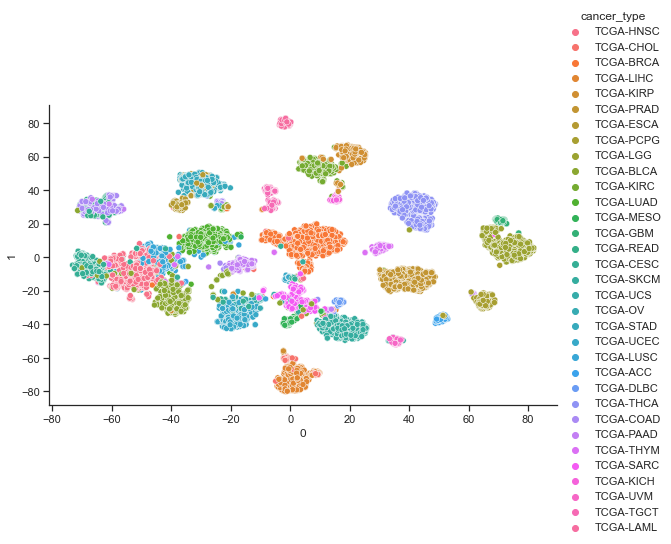

In [71]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set(style='ticks')

cancer_types = grouped_tsne_late['cancer_type'].tolist()
cancer_types = list(set(cancer_types))

seaborn.relplot(data=grouped_tsne_late, x=0, y=1, hue='cancer_type', hue_order=cancer_types, aspect=1.61)
plt.show()

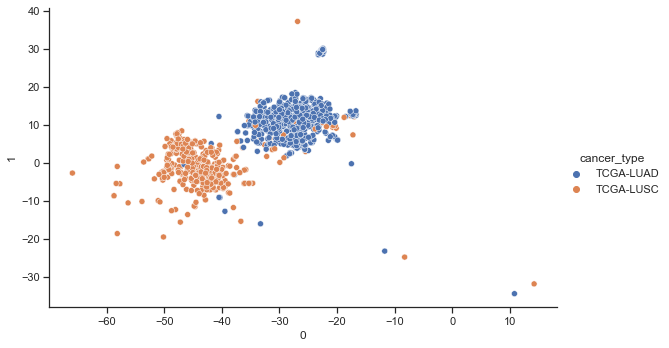

In [72]:
lung_cancer_types = ["TCGA-LUAD","TCGA-LUSC"] 
lung_cancer_df = grouped_tsne_late[grouped_tsne_late['cancer_type'].isin(lung_cancer_types)]

seaborn.relplot(data=lung_cancer_df, x=0, y=1, hue='cancer_type', hue_order=lung_cancer_types, aspect=1.61)
plt.show()

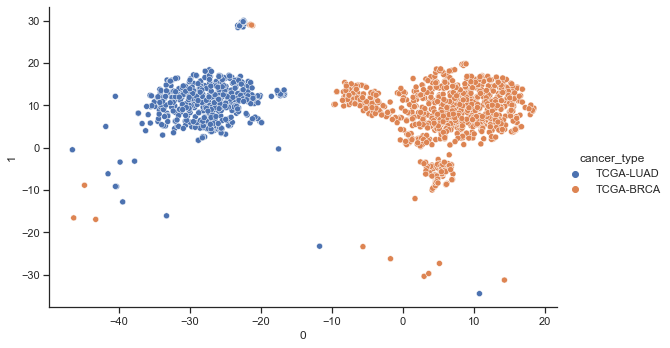

In [73]:
lung_breast_cancer_types = ["TCGA-LUAD","TCGA-BRCA"] 
lung_breast_cancer_df = grouped_tsne_late[grouped_tsne_late['cancer_type'].isin(lung_breast_cancer_types)]

seaborn.relplot(data=lung_breast_cancer_df, x=0, y=1, hue='cancer_type', hue_order=lung_breast_cancer_types, aspect=1.61)
plt.show()